# CMSC6950 Parallel Computing
## Introduction: A Lennard Jones System


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lennard_jones_potential import *
%matplotlib inline

### The Lennard-Jones Potential

The Lennard-Jones potential (also referred to as the L-J potential, 6-12 potential, or 12-6 potential) is a mathematically simple model that approximates the interaction between a pair of neutral atoms or molecules.

There are many different ways of formulating the Lennard-Jones potential. 

We are going to use the followig form, sometimes referred to as AB-form: 


$$ V_{LJ} =  \left( \frac{A}{r^{12}} \right) - \left( \frac{B}{r^{6}} \right) $$

The function is implemented as:

```python
def v_LJ(r, A=5174175., B=27075.):
    "calculates Lennard-Jones potential for given distance r and A & B parameters"
    return ( (A/(r**12)) - (B/(r**6)) )
```


To visualize the potential we create a series of nineary spaced distances between 0.1 and 10, calculate the potential energy for each of them and plot it using matplotlib:

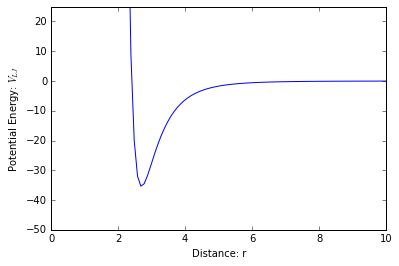

In [15]:
distances = np.linspace(0.1,10.0, 101) # 101 values from 0.1 to 10
potentials = []
for d in distances:
    potentials.append( v_LJ(d) )

# Plot LJ potential
plt.plot(distances, np.array(potentials) )
plt.axis([0, 10, -50.0, 25.0])
plt.xlabel("Distance: r")
plt.ylabel("Potential Energy: $V_{LJ}$")

### The System

We use the function generate_coordinates() to generate a list of *n* pseudo-random coordinates in a *dim* dimensional space.  The coordinates are random samples from a uniform distribution between 0 and *upper*, i.e. *upper* is the size of our square (dim=2) / cubic (dim=3) simulation box.

The seed is used to initialize the pseudo-random-number-generator (prng) to produce always the same system.

The function is implemented as:

```python
def generate_coodinates(n=1000, dim=2, upper=100, seed=1):
    "generates n random coordinates in dim dimensional space"
    np.random.seed(seed)
    coords = np.random.rand(n, dim) * upper
    return coords
```


A 2-dimensional system of 100 particles looks like:

[0, 10, 0, 10]

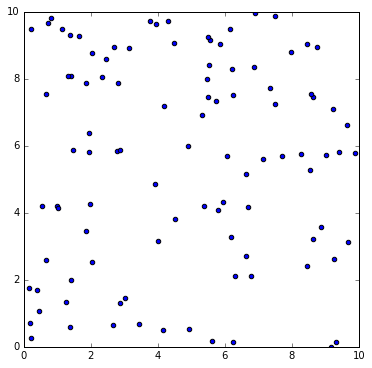

In [3]:
coords = generate_coodinates(100,2,10)

plt.figure(1, figsize=(6,6))
plt.scatter(coords.T[0], coords.T[1])
plt.axis([0, 10, 0, 10])


### Calculating Distances

To calculate the distances of every combination of i-j pairs, we only need to consider combinations of points where $j > i$ because when $i=j$ the distance is 0 and $r_{i,j} = r_{j,i}$ and there is no need to account for a the same pair twice.


```
j\i  1   2   3   4

1    -   -   -   -

2   21   -   -   -

3   31  32   -   -

4   41  42  43   - 
```

To calculate the distance $r$ we use the Pythagorean Theorem:

$$ r_{ij} = \sqrt{ (x_i - x_j)^2 + (y_i - y_j)^2 } $$

or it's expansion to the 3rd dimension:
$$ r_{ij} = \sqrt{ (x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2 } $$

The function is implemented as:

```python
def calc_distances(points):
    "calculate distances for each pair of points"
    distances = []
    for i in range(len(points)):
        for j in range(len(points)):
            if j>i:
                r = np.sqrt(np.sum(np.square(np.subtract(points[i],points[j]))))
                distances.append(r)

    return np.array(distances)
```

For computational efficiency it makes use of the numpy functions `subtract`, `square`, `sum`, and `sqrt`.


In [18]:
def run_serial(n_points):
    ''' Run the calculation of the potiential energy in serial.
    
    - generate coordinates for *n_points* of particles.
    - calculate the distances for particle pairs
    - calculate the LJ potential and sum it up.
    - print the total energy    
    '''
    coords  = generate_coodinates(n_points, 3, upper=100, seed=5)
    
    dists   = calc_distances(coords)
    
    v_total = 0
    for d in dists:
        v_total += v_LJ(d)
    
    print(v_total)

In [19]:
    %timeit run_serial(2000)

23630468668.9
23630468668.9
23630468668.9
23630468668.9
1 loop, best of 3: 13.8 s per loop
